<a href="https://colab.research.google.com/github/KhomZ/image-processing-and-pattern-recognition/blob/main/after_examCopy_of_DeepLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing some important libraries:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from glob import glob
from skimage import io
from shutil import copy

from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Input
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = glob('/content/drive/MyDrive/mydata/*.xml')

In [ ]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:
  info = xet.parse(filename)
  root = info.getroot()
  member_object = root.find('object')
  #Collecting important data from xml files:
  labels_info = member_object.find('bndbox')
  xmin = int(labels_info.find('xmin').text)
  xmax = int(labels_info.find('xmax').text)
  ymin = int(labels_info.find('ymin').text)
  ymax = int(labels_info.find('ymax').text)
  #Storing data into dictionary:
  labels_dict['filepath'].append(filename)
  labels_dict['xmin'].append(xmin)
  labels_dict['xmax'].append(xmax)
  labels_dict['ymin'].append(ymin)
  labels_dict['ymax'].append(ymax)

In [ ]:
mydata = pd.DataFrame(labels_dict)
mydata.to_csv('mycsv.csv',index=False)
mydata.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/mydata/Cars92.xml,281,393,185,271
1,/content/drive/MyDrive/mydata/Cars332.xml,143,260,126,159
2,/content/drive/MyDrive/mydata/Cars48.xml,95,286,117,155
3,/content/drive/MyDrive/mydata/Cars28.xml,541,598,366,384
4,/content/drive/MyDrive/mydata/Cars390.xml,360,397,118,136


In [ ]:
filename = mydata['filepath'][0]
def getFilename(filename):
    image_name = xet.parse(filename).getroot().find('filename').text
    image_path = os.path.join('/content/drive/MyDrive/mydata',image_name)
    return image_path
getFilename(filename)

'/content/drive/MyDrive/mydata/Cars92.png'

In [ ]:
import random
rand_num=random.randint(0,len(mydata['filepath']))
rand_num

114

In [ ]:
file_path=list(mydata['filepath'])
file_path[:5]

['/content/drive/MyDrive/mydata/Cars92.xml',
 '/content/drive/MyDrive/mydata/Cars332.xml',
 '/content/drive/MyDrive/mydata/Cars48.xml',
 '/content/drive/MyDrive/mydata/Cars28.xml',
 '/content/drive/MyDrive/mydata/Cars390.xml']

In [ ]:
#Checking whether there is any null value in dataset or not:
col_null=[x for x in mydata.columns if mydata[x].isnull().sum()>0]
col_null

[]


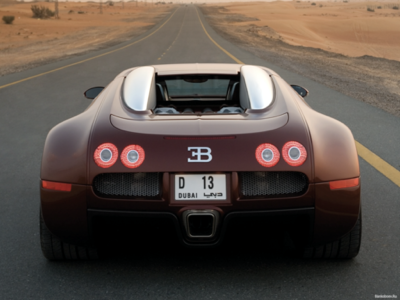

In [ ]:
image_path = file_path[rand_num] #path of our random image.
#image_path
filt=mydata["filepath"]==image_path
obj=getFilename(image_path)
img = cv2.imread(obj) #read the image
xmin=mydata[filt]['xmin']
xmax=mydata[filt]['xmax']
ymin=mydata[filt]['ymin']
ymax=mydata[filt]['ymax']
img = io.imread(obj) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Vehicle with bounding box')
fig.add_shape(type='rect',x0=int(xmin), x1=int(xmax), y0=int(ymin), y1=int(ymax), xref='x', yref='y',line_color='cyan')


In [ ]:
dataset=pd.read_csv('mycsv.csv')
dataset.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/mydata/Cars92.xml,281,393,185,271
1,/content/drive/MyDrive/mydata/Cars332.xml,143,260,126,159
2,/content/drive/MyDrive/mydata/Cars48.xml,95,286,117,155
3,/content/drive/MyDrive/mydata/Cars28.xml,541,598,366,384
4,/content/drive/MyDrive/mydata/Cars390.xml,360,397,118,136


In [ ]:
dataset['filepath']=dataset['filepath'].str.replace('xml','png')

In [ ]:
mydata.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/mydata/Cars92.xml,281,393,185,271
1,/content/drive/MyDrive/mydata/Cars332.xml,143,260,126,159
2,/content/drive/MyDrive/mydata/Cars48.xml,95,286,117,155
3,/content/drive/MyDrive/mydata/Cars28.xml,541,598,366,384
4,/content/drive/MyDrive/mydata/Cars390.xml,360,397,118,136


In [ ]:
dataset.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/mydata/Cars92.png,281,393,185,271
1,/content/drive/MyDrive/mydata/Cars332.png,143,260,126,159
2,/content/drive/MyDrive/mydata/Cars48.png,95,286,117,155
3,/content/drive/MyDrive/mydata/Cars28.png,541,598,366,384
4,/content/drive/MyDrive/mydata/Cars390.png,360,397,118,136


In [ ]:
dataset.to_csv('mycsv1.csv',index=False)

In [ ]:
dataset=pd.read_csv('mycsv1.csv')

In [ ]:
dataset.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/mydata/Cars92.png,281,393,185,271
1,/content/drive/MyDrive/mydata/Cars332.png,143,260,126,159
2,/content/drive/MyDrive/mydata/Cars48.png,95,286,117,155
3,/content/drive/MyDrive/mydata/Cars28.png,541,598,366,384
4,/content/drive/MyDrive/mydata/Cars390.png,360,397,118,136


In [ ]:
image_path = list(dataset['filepath'])

In [ ]:
#Targeting all our values in array selecting all columns
labels = dataset.iloc[:,1:].values
data = []
output = []
for i in range(len(image_path)):
    image = image_path[i]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[i]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)


In [ ]:
# Convert data to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [ ]:
# Split the data into training and testing set using sklearn.
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((346, 224, 224, 3), (87, 224, 224, 3), (346, 4), (87, 4))

In [ ]:
# X_train_flattened = x_train.reshape(len(x_train), 28*28)
# X_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
#Building CNN model:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2,ResNet152

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)

# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)


219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#Compiling model:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
es=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
his = model.fit(x_train, y_train, epochs=50,callbacks=es,
                batch_size=10,
                    validation_data=(x_test, y_test))

Epoch 1/50
35/35 [==============================] - 47s 406ms/step - loss: 1.1306 - accuracy: 0.3468 - val_loss: 162.5919 - val_accuracy: 0.5402
Epoch 2/50
35/35 [==============================] - 8s 236ms/step - loss: 0.6966 - accuracy: 0.5491 - val_loss: 17.0547 - val_accuracy: 0.4368
Epoch 3/50
35/35 [==============================] - 8s 238ms/step - loss: 0.6739 - accuracy: 0.5925 - val_loss: 8.8478 - val_accuracy: 0.4943
Epoch 4/50
35/35 [==============================] - 8s 240ms/step - loss: 0.6456 - accuracy: 0.7023 - val_loss: 0.8052 - val_accuracy: 0.7586
Epoch 5/50
35/35 [==============================] - 9s 261ms/step - loss: 0.6591 - accuracy: 0.6792 - val_loss: 9.2671 - val_accuracy: 0.4943
Epoch 6/50
35/35 [==============================] - 10s 281ms/step - loss: 0.6576 - accuracy: 0.7543 - val_loss: 17.0426 - val_accuracy: 0.4483
Epoch 7/50
35/35 [==============================] - 9s 265ms/step - loss: 0.6351 - accuracy: 0.7486 - val_loss: 0.9329 - val_accuracy: 0.5517


3/3 - 3s - loss: 0.6259 - accuracy: 0.8966 - 3s/epoch - 874ms/step


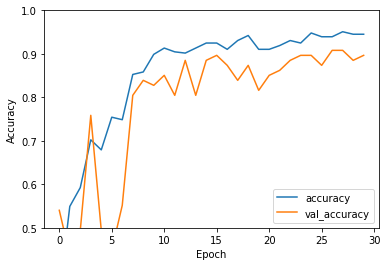

In [ ]:
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

0.8965517282485962


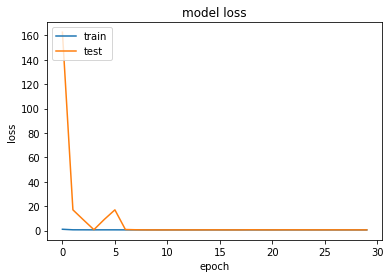

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!mkdir -p saved_model

In [ ]:
model.save('saved_model/abc122')

In [ ]:
new_model = tf.keras.models.load_model('saved_model/abc122')
# Check its architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
path = '/content/drive/MyDrive/pic/c1.png'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # Convert into array and get the normalized output

# Size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)


Height of the image = 510
Width of the image = 827



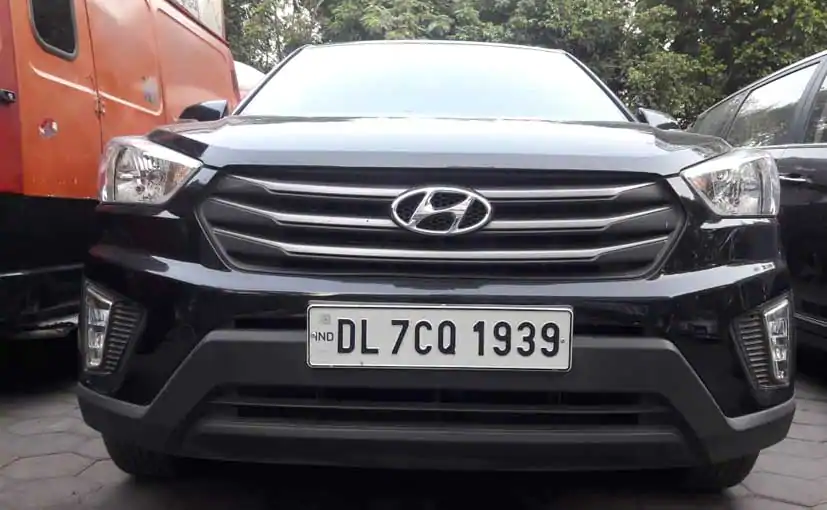

In [ ]:
fig = px.imshow(image)
fig.update_layout(width=600, height=500,  margin=dict(l=10, r=10, b=10, t=10), xaxis_title='TEST Image')

In [ ]:
image_arr_224.shape

(224, 224, 3)

In [ ]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape


(1, 224, 224, 3)

In [ ]:
# Make predictions
coords =new_model.predict(test_arr)
coords

array([[0.4557384 , 0.67720413, 0.5865719 , 0.7824166 ]], dtype=float32)

In [ ]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[410.16455591, 609.48371887, 322.61452973, 430.32912016]])

In [ ]:
coords = coords.astype(np.int32)
coords

array([[410, 609, 322, 430]], dtype=int32)

In [ ]:
# Draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
# pt1 =(xmin,ymin)
# pt2 =(xmax,ymax)
# print(pt1, pt2)

In [ ]:
# cv2.rectangle(image,pt1,pt2,(0,255,0),3)
# fig = px.imshow(image)
# fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))


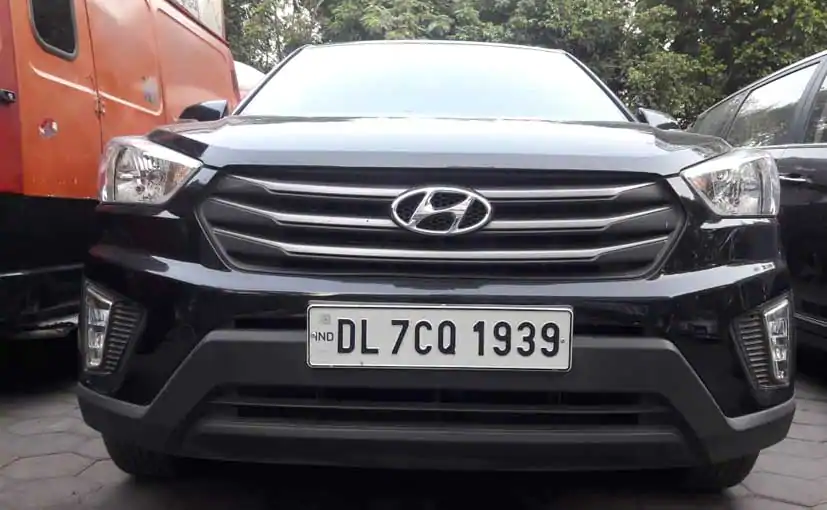

In [ ]:

fig = px.imshow(image)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10))
fig.add_shape(type='rect',x0=int(xmin), x1=int(xmax), y0=int(ymin), y1=int(ymax), xref='x', yref='y',line_color='red')